<img src="resources/0_intro/intro.013.jpeg">


<img src="resources/0_intro/intro.014.jpeg">


<img src="resources/0_intro/intro.015.jpeg">


<img src="resources/0_intro/intro.016.jpeg">


## Regression

- Predict results within a continuous output 
- Map input variables to some continuous function


<img src="resources/linreg.png">


> In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. *(Wikipedia)*



### So, what's the difference between Statistical Models and Machine Learning?
- Especially with Regression, these two are closely related
- Main Purpose Machine Learning
    - Make predictions about future data
    - Training and search for best performance on the test set by optimizing our function

- Main Purpose Statistical Modeling
    - Characterize the relationship between the data and our outcome variable
    - No training and testing
    - Interpretability
- Machine Learning is built upon Statistics

### Linear Regression

- The "Hello World" for Machine Learning 
- Technical definition: linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 
- The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

#### Formula for linear function
$h(x) = m*x + b $ **or  $h(x) = \theta_0 + \theta_1 *x_1 $(one feature)<br>
$h(x) = \theta_0 + \theta_1*x_1 + \theta_2*x_2 + ... + \theta_n * x_n $ (more features)**

#### Ordinary Least Square (OLS)
- Simple standard linear regression method
- Goal is to minimize the difference between observed values and estimated values.
- In detail: We try to find the parameters that minimize the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function

#### Weights
- mx + b; m = slope, b = intercept, m and b are called "weights"
- also called: $w_0, w_1 $ ... or $ \theta_0, \theta_1 $ ...
- Weights are the parameters we can change and therefore use to optimize our model


<img src="resources/optimizing.png">


#### But how do we know how good our model is? 
- We need an error-function (synonyms: loss function, cost function)
- Try to minimize the error, best would be an error of 0.


#### Error function in detail
- Function in dependency of $ \theta$-Weights: $ J (\theta) $
- MSE (Mean Squared Error)
    - $J(\theta_0, \theta_1) = \frac{1}{2*m} * \sum_{i=1}^{m} (\hat{y_i} - y_i)^2 $ = $\frac{1}{2*m} * \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2 $
    
$\hat{y} :=$ Estimation 


### Minimization of our error 
- We start with random weights a and b. 
- We try to come to the minimum of our loss function - that is the best we can get
- How: With **Gradient Descent**. The derivative of the loss function at a certain point x tells us about the slope. If it's negative we go to the right, otherwise left
- We are making small steps until it converges at a certain minimum point
- If the derivative equals 0, we are probably where we wanted to get (or at a socalled local minimum or even maximum. There are certain techniques to avoid that we accidently take that as our best function)

<img src="resources/gradient_descent.png">


####  Gradient Descent in more dimensions
- If we have only two dimensions, then it's easy and we can talk of "right" and "left" 
- usually we have more than two dimensions (more features) and we need a more dimensional derivative in a certain direction 


### Why would I use Linear Regression?
- the simplest machine learning method
- a lot of other techniques base on it
- good "lower bound"
- despite its simplicity good model for some problems


### Let's try it in practice
- we will work with the boston house data set where we will try to predict the prize of a house on the basis of certain properties of the house (features)

#### The Boston House Dataset
- Data from 1993
- Very common dataset amongst machine learning courses 
- easy to understand and to use without a lot of data preparation first
- 506 samples, 13 features
- implemented in sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
print(boston['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:

bos = pd.DataFrame(boston.data, columns=boston.feature_names)
print(bos.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [6]:
print(bos.shape)
bos.head(3)

(506, 13)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03

In [7]:
bos['MEDV'] = boston.target

In [8]:
bos.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7

### How do the features correlate?

In [9]:
bos.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

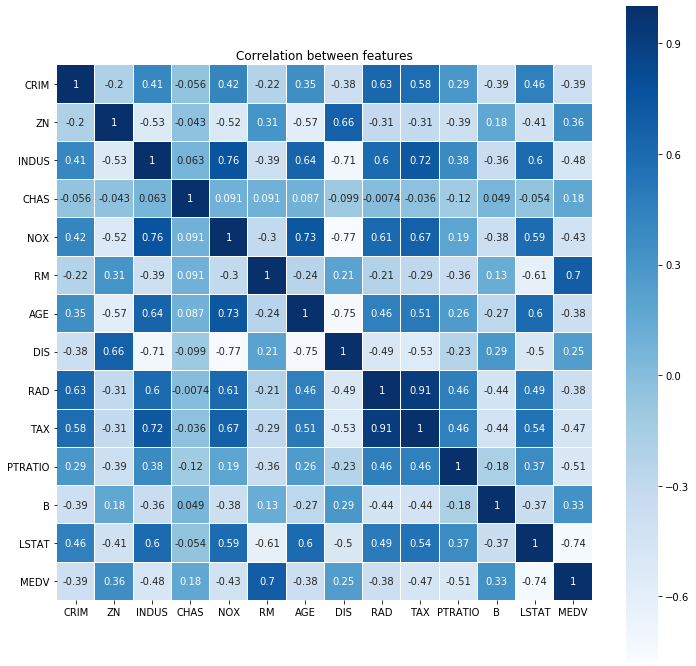

In [10]:
corr=bos.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="white")
plt.title('Correlation between features');

In [11]:
#Data Preprocessing
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exercise 1 (you can work with the notebook 2_Exercices_Regression)
- Look at the heatmap from our previous exploration and choose two features you want to work with. 
- Import the libraries and data you need. 
- Feel free to play around with the data!
- Load the dataset in a pandas dataframe, then select the two columns of your choice and assign them to a new dataframe
- Add `boston.target` as last column to your new dataframe, and assign it to the column name 'MEDV'
- Make a heatmap with your new dataframe to check if the results are like before

## Linear Regression with sklearn



In [12]:
# Import Regressor class and instantiate an object 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Parameters

fit_intercept : boolean, optional, default True

    whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
normalize : boolean, optional, default False

    This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
copy_X : boolean, optional, default True

    If True, X will be copied; else, it may be overwritten.
n_jobs : int or None, optional (default=None)

    The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.


In [13]:
# Split in features and target
x = bos.drop(columns='MEDV') # sklearn allows pd dataframes 
y = boston.target  
print(x.head())
print("\n", y)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  

In [14]:
# Split our features and target in training and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
5     0.02985  0.0   2.18   0.0  0.458  6.430  58.7  6.0622   3.0  222.0   
116   0.13158  0.0  10.01   0.0  0.547  6.176  72.5  2.7301   6.0  432.0   
45    0.17142  0.0   6.91   0.0  0.448  5.682  33.8  5.1004   3.0  233.0   
16    1.05393  0.0   8.14   0.0  0.538  5.935  29.3  4.4986   4.0  307.0   
468  15.57570  0.0  18.10   0.0  0.580  5.926  71.0  2.9084  24.0  666.0   

     PTRATIO       B  LSTAT  
5       18.7  394.12   5.21  
116     17.8  393.30  12.04  
45      17.9  396.90  10.21  
16      21.0  386.85   6.58  
468     20.2  368.74  18.13

In [15]:
# Training, finally!

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Check how well the model fits to our trainings data

lr.score(x_train, y_train)

0.7434997532004697

In [17]:
# ... and to our test data

lr.score(x_test, y_test)

0.7112260057484903

In [18]:
# Our target predictions 
lr.predict(x_test)

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [27]:
print(lr.coef_)
print(lr.intercept_)

[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
31.63108403569186


### Exercise 2: Train a linear regression model with your data
- import the sklearn classes you need
- prepare your data for training and train your model
- check how good (or bad?) the model scored

- *Bonus*: Drop another column and instantiate a second regression object (with only one feature). Visualize your prediction (you will need matplotlib for that: Useful functions are `scatter()` and `plot()`)

## Regularization 
- A form of regression, that constrains or shrinks the coefficient estimates towards zero. 
- Techniques to optimize our model
- We try to find optimal balance between over- and underfitting
- Ridge Regression and Lasso Regression
- Don't use with very big datasets


#### Ridge Regression
- L2-Regularization
- pushes the coefficients towards 0
- good technique to avoid overfitting
- `alpha`: Regularization parameter 
    - The higher you choose alpha, the more general your model gets
    - If you choose an alpha close to 0, it's not regularized any more: it's like the simple Linear Regression
    - Default `alpha` value = 1




#### Lasso Regression
- L1-Regularization
- similar to Ridge Regression
- difference L2-regularization: some coefficients become exactly 0 --> some features are completely ignored. So, this works well for feature selection in case we have a huge number of features.


#### Linear Regression vs. Regularization
Ridge or Lasso Regression perform better on small datasets. 
With growing dataset the performance of Linear Regression gets better until they perform simularly well (or bad)

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
print(ridge.score(x_test, y_test))

0.7041586727559437


In [29]:
ridge5 = Ridge(alpha=5).fit(x_train, y_train)
ridge5.score(x_test, y_test)

0.6970172810260663

In [30]:
max_score = 0.0
alpha_val = [0.1, 0.5, 2, 10, 100]
for i, alph in enumerate(alpha_val):
    ridge = Ridge(alpha=alph).fit(x_train, y_train)
    score = ridge.score(x_test, y_test)
    print(alph, score)
    if score > max_score:
        max_score = score
        alph_best = alph
print ('\nBest Alpha: ', alph_best, '. Score: ', max_score)

0.1 0.710317820639133
0.5 0.707075618914623
2 0.7007316205685641
10 0.6954181695183627
100 0.685043695509498

Best Alpha:  0.1 . Score:  0.710317820639133


In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2).fit(x_train, y_train)
lasso.score(x_test, y_test)


0.689876740203904

In [32]:
print("Number of used coefficients: {}".format(np.sum(lasso.coef_ != 0)))
print("Number of not used coefficients: {}".format(np.sum(lasso.coef_ == 0)))


Number of used coefficients: 10
Number of not used coefficients: 3


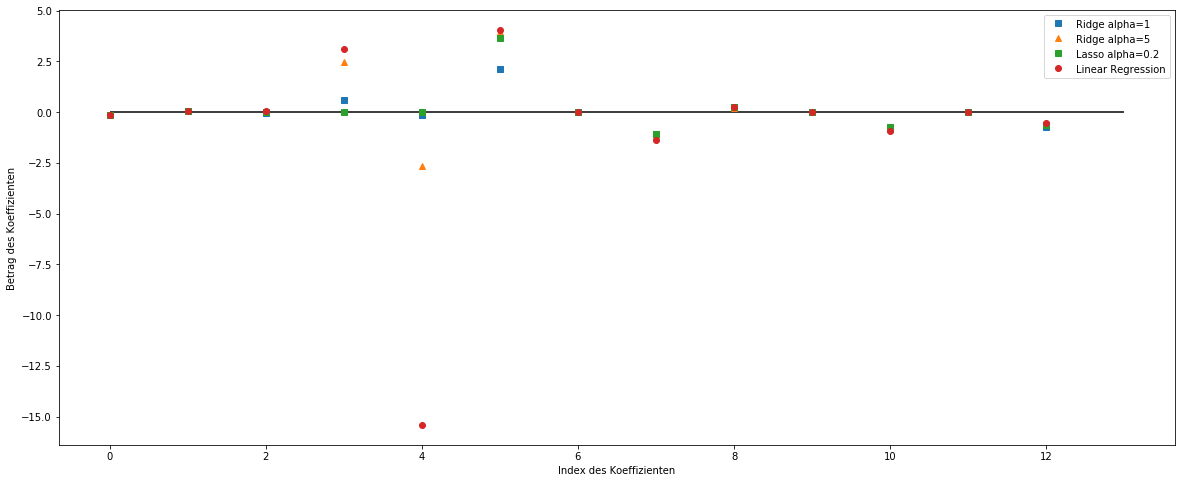

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge5.coef_, '^', label="Ridge alpha=5")
plt.plot(lasso.coef_, 's', label="Lasso alpha=0.2")
plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Index des Koeffizienten")
plt.ylabel("Betrag des Koeffizienten")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()
plt.show()

## Metrics 
- how good does my model perform?
- **R2 (R-squared)** is a statistical measure of how close the data are to the fitted regression line. 
- R-squared = Explained variation by our model / Total variation
- is generally between 0 and 100% (0% indicates that the model explains none of the variability of the response data around its mean, 100% indicates that the model explains all the variability of the response data around its mean)
- In general, the higher the R-squared, the better the model fits your data. 

- related to **MSE (Mean Squared Error)** which can also be used as metric

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse, '\nR2 Score: ', r2)

MSE:  21.517444231177432 
R2 Score:  0.7112260057484903


### Polynomielle Regression
- Add more complexity to our model with polynomial features
- "Feature interaction"
- `PolynomialFeatures` implemented in sklearn


<img src="resources/polyreg.png">


In [50]:

from sklearn.preprocessing import PolynomialFeatures

x = boston.data[:, :2]
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

pf = PolynomialFeatures(degree=3)
pf.fit(x_train)

x_trans_train = pf.transform(x_train)
x_trans_test = pf.transform(x_test)

print(pf.n_input_features_)
print(pf.n_output_features_)
print(pf.get_feature_names())


2
10
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


In [51]:
linear = LinearRegression()
linear.fit(x_train, y_train)
score = linear.score(x_test, y_test)
score

0.22816926479201516

In [52]:
linear_pol = LinearRegression()
linear_pol.fit(x_trans_train, y_train)
score = linear_pol.score(x_trans_test, y_test)
score

0.3020240159155483

### Exercise 3: Optimize your model 
- Try to get your model better with Lasso or Ridge Regression
- Try to get your model better with polynomial features, play with different degrees


### Illustration polynomial regression 

Score:  0.1379158770683232  for degree:  1
Score:  0.4505264014967831  for degree:  2
Score:  0.9811137675416588  for degree:  5
Score:  0.8248811461513378  for degree:  300


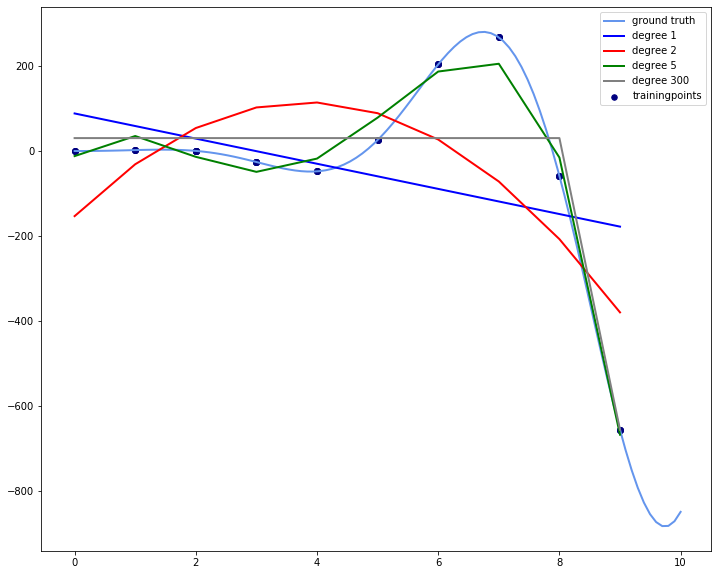

In [53]:
def f(x):
    return np.cos(x)*x**3 + 2*x * np.sin(x)


x = np.linspace(0, 10, 100)
y = f(x)

# Dataset
x_data = np.expand_dims(np.random.randint(0, 10, 100), axis=1)
x_data = np.sort(x_data, axis=0)
y_data = f(x_data)

fig = plt.figure(figsize=(12,10))

plt.plot(x, y, color="cornflowerblue", linewidth=2, label="ground truth")
plt.scatter(x_data, y_data, color="navy", s=30, marker="o", label="trainingpoints")


colors = ["blue", "red", "green", "grey"]
for count, degree in enumerate([1, 2, 5, 300]):
    # nonlinear transformation
    model = PolynomialFeatures(degree)
    model.fit(x_data, y_data)
    x_trans_data = model.transform(x_data)
    # linear regression
    linear = LinearRegression()
    linear.fit(x_trans_data, y_data)
    y_pred = linear.predict(x_trans_data)
    print("Score: ", linear.score(x_trans_data, y_data), " for degree: ", degree)
    plt.plot(x_data, y_pred, color=colors[count], linewidth=2, label="degree %d" % degree)


plt.legend()
plt.show()